# Introduction

Student: Irakli Bagratishvili

Student ID: 0586661

E-mail: irakli.bagratishvili@vub.be


---
**Introduction**
> Genes store and encode genetic information that defines a phenotype of an organism in terms of expressing it through multitude of biochemical processes. According to the central theory of molecular biology, genetic information moves unidirectionally from DNA to relevant proteins responsible for phenotypical representation of an organism. Indeed, gene expression is what defines the observable phenotypical appearance of an organism. For at least last two decades, focus of molecular biology and computer scientists have been developing tools to process and interpret gene expression data.

>  Apart from relevance to molecular biology, these developments have practical implications too. Specifically, understanding gene expression profiles allow us to discover important genes responsible for various diseases. If decades ago it was very complicated to model and understand relations between thousand of genes, todays computational methods allow us to find these relations in matters of seconds. Particularly, Machine Learning has shown promising and impressive results in processing gene expression data. Various algorithms specialize in taking many inputs, processing them and giving meaningful, interpretable output. 

> In many cases, Machine Learning is used in a supervised way, to train classifiers with existing (labeled) gene expression data, to be able to predict various outcomes based on hundreds/thousands of different input variables. Classification tasks, such as identifying type or stage of various cancers have already been implemented and explored.

> Another useful application of Machine Learning is clustering unlabeled data in unsupervised manner to discover new correlations between genes and their phenotypical expression. Possible practical implications of clustering gene expression data are immense, which is why it is a popular application of ML in molecular biology.

> In this scope of this project, gene expression data of lung cancer patients have been obtained, preprocessed and used to compare the performance of two different supervised machine learning algorithms - Support Vector Machines (SVM) and K-nearest Neighbors (KNN). The goal of the project is to compare these two algorithms in terms of predicting whether patient has adenocarcinoma (ADC) or another type of lung cancer. 


# Data and Methods



**Dataset**
> [The dataset](https://web.archive.org/web/20080207153800/http://research.i2r.a-star.edu.sg/rp/) used for this project was obtained through [Weka website ](https://waikato.github.io/weka-wiki/datasets/) . It consists of gene expression data on lung tumor specimens from 39 samples. Out of 39 subjects, some cases belong to ADC, some to Squamous cell carcinoma, some to adeno-squamos carcinoma, etc. As large portion of sample are labeled as having ADC, I decided to set up binary classification task instead of multi-class classification. Also, the data is described by 2880 different genes. Additionally, the author of dataset provide [extra data](https://web.archive.org/web/20040921081304/http://www.cs.toronto.edu/~juris/publications/data/CR02Table1.txt) giving us more information about the patients, their cancer types, stages, etc.

<img src='https://drive.google.com/uc?id=1BGEx9xpSsPN3UyVq-uFk4KgO__E6wILe'></img>

> The original gene expression data contains gene expression values and one label variable indicated whether patient relapsed or not. In this scope of this project I decided to remove the label variable and replace it with type and stage of cancer for each patient respectively. To achieve this, I had to manually map the patient IDs from the general gene expression data, to the additional informative dataset about the patients. I used Microsoft Excel to map the data and arrange it in a format that would be easilly processed by ML tools. Using Pandas library original gene expression dataset and cancer type dataset were concatenated for further preprocessing. 

**Machine Learning Methods**



> Before discussing implemented machine learning models, we should mention feature selection, part of data science, that is useful when working with high-dimensional data. Specifically, feature selection considers identifying a subset of important features accounting for a major part of variance in the data. When working with high-dimensional data such as gene expression profiles, computational time and resources are aspects to consider. That is why, quite often, various methods of feature selection are used before applying machine learning algorithms to data. Apart from computational advantages, feature selection can help in identifying important genes and have interpretable results. It is often the case, when many genes (features) do not contribute to label prediction, increase noise in data and contribute to overfitting. That is why identifying subset of relevant features is particularly important in gene expression profiling applications.

> Princpical Component Analysis (PCA) is one of the popular unsupervised feature selection procedures which projects high-dimensional data into low-dimensional representation. As a result, low-dimentional dataset should be able to describe as much variance in data as possible. PCA method creates new variables called principal components which are linear combinations of original features. Principal components are calculated using singular value decomposition (SVD). 

> PCA requires prior data normalization to be able to identify important features correctly. For this purpose, implemented algorithms were tested for three cases: for unscaled data(1), for scaled data(2) and for scaled and PCA data (3). This allows to compare the effects of scaling and feature selection to the final classification result.

> As for choosing Machine Learning models, the selection decision was based on few factors:
*   Number of instances in the dataset
*   Number of dimensions (features)
*   Extent of correlation between features
*   Risks of overfitting.

> Considering abovementioned factors, Support Vector Machine and KNN algorithms were chosen for comparison. Both algorithms are considered as traditional supervised learning algorithms. SVM is often used with high-dimensional data, as well as problems which are not always linearly separable. To tackle this SVM can be adjusted to non-linear kernel (rbf). SVM is also known to take lots of computational time when working on dataset with many instances. For gene expressional data with low amount of instances and high-dimensionality, SVM seemed like a viable option.  

> KNN is a simple to implement, fast supervised learning algorithm that can be used both for classification and regression tasks (like SVM). KNN aims at predicting correct labels/classes by estimating the distance between test data and all training points. Algorithm then chooses number of points (K) that are closest to test data and calculates probabilities of test datapoints belonging to the classes of training data. Finally, it selects the K-number with highest probabilities. One of the main advantage of KNN is its simplicity. Most of the time tuning two hyper parameters - Distance measure and K-number are enough to come up with optimal model. K value determines amount of neighbors participating in the algorithm, while distance function calculates similarity distance (e.g Euclidean, Manhattan, Minkowski distances). 

> When comparing SVM and KNN, SVM seems to deal with outliers better than KNN. Also, KNN is known to perform better than SVM when training data is larger that number of features. Similarly, SVM performs better than KNN when the amount of instances is smaller than features. Based on these assumptions, we should expect SVM to show better results than KNN for our dataset. 

**Methods**

The project was implemented in Python using several important libraries such as:
*   Sklearn (for machine learning algorithms)
*   Pandas (for data preprocessing and visualization)
*   NumPy (for data preprocessing)
*   Sklearn (for PCA)

> After concatenating two datasets (main gene expression data & additional data for cancer types per patient), labels (cancer type) were binarized based on ADC (0) and other (1) cancer types. Multiple features were missing values, so those columns were removed (another option is to replace them with a mean of features from other instances). The resulting features were normalized using StandardScaler method from Sklearn and saved separately as scaled features. As already mentioned SVM and KNN were implemented for unscaled, scaled and scaled & PCA datasets separately. 

> PCA was conducted on scaled features set to come up with principal components accounting for 98% variance. As a result 10 features were identified. 

> To find optimal hyper parameters for SVM and KNN algorithms, GridSearchCV method (Sklearn) was implemented with various sets of parameters (with 5-fold cross validation). 

> for SVM the hyper parameters set included:
*   C : [0.001, 0.01, 0.1, 1, 10, 100]
*   gamma : ['scale', 'auto']
*   kernel : ['linear', 'rbf', 'poly']
*   decision function shape : ['ovo','ovr']

> for KNN the hyper parameters set included:
*   K : number of neighbors
*   distance: ['minkowski','manhattan','euclidean']
*   weights : ['uniform','distance']

In total 6 models were checked: 

*   SVM: (1) unscaled, (2) scaled, (3) scaled and PCA
*   KNN: (1) unscaled, (2) scaled, (3) scaled and PCA

For each model classification report (Sklearn) was generated to compare F1, precision and recall scores of different models.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import packages and load dataset

In [97]:
# Import necessary packages and loading dataset file

from scipy.io import arff
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_score, confusion_matrix
from sklearn import svm
import seaborn as sns

# Loading dataset into pd dataframe
dataset = arff.loadarff(open('/content/drive/MyDrive/Colab Notebooks/lungcancer-ontario.arff'))
df = pd.DataFrame(dataset[0])
df.head()

,588029,417978,382829,376627,259279,324734,429708,322193,503131,277496,...,297953,24000,490953,43831,27963,446486,214594,252788,243359,Class
0,0.195,0.200,0.130,0.170,0.140,0.130,0.165,0.270,0.215,0.240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195,NaN,b'Relapse'
1,0.375,0.190,0.145,0.320,0.280,0.230,0.120,0.235,0.225,0.265,...,NaN,NaN,0.255,NaN,NaN,0.17,0.385,0.360,0.250,b'Relapse'
2,1.780,0.380,1.610,1.620,0.385,0.440,0.330,7.890,0.370,1.490,...,0.280,0.535,NaN,1.70,0.405,0.96,0.700,0.240,0.315,b'Relapse'
3,0.645,0.495,0.460,0.485,0.575,0.405,0.415,0.600,0.620,0.285,...,1.675,0.590,0.650,0.42,0.590,1.84,0.750,0.685,1.120,b'Relapse'
4,0.665,0.660,0.590,0.730,0.440,0.695,0.605,0.570,0.265,0.730,...,0.990,0.485,0.775,0.43,0.810,0.62,0.245,0.705,0.770,b'Relapse'


# Preprocessing Dataset

In [98]:
#@title Visualizing dataset without label
# Removing Class column
df_without_label = df.drop('Class',1)
df_without_label.head()

,588029,417978,382829,376627,259279,324734,429708,322193,503131,277496,...,324354,297953,24000,490953,43831,27963,446486,214594,252788,243359
0,0.195,0.200,0.130,0.170,0.140,0.130,0.165,0.270,0.215,0.240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195,NaN
1,0.375,0.190,0.145,0.320,0.280,0.230,0.120,0.235,0.225,0.265,...,0.390,NaN,NaN,0.255,NaN,NaN,0.17,0.385,0.360,0.250
2,1.780,0.380,1.610,1.620,0.385,0.440,0.330,7.890,0.370,1.490,...,0.995,0.280,0.535,NaN,1.70,0.405,0.96,0.700,0.240,0.315
3,0.645,0.495,0.460,0.485,0.575,0.405,0.415,0.600,0.620,0.285,...,0.430,1.675,0.590,0.650,0.42,0.590,1.84,0.750,0.685,1.120
4,0.665,0.660,0.590,0.730,0.440,0.695,0.605,0.570,0.265,0.730,...,1.180,0.990,0.485,0.775,0.43,0.810,0.62,0.245,0.705,0.770


In [99]:
#@title importing additional data for the dataset (This table contains information about patients. e.g cancer stage, type, age, etc.)
# importing additional data for the dataset (This table contains information about patients. e.g cancer stage, type, age, etc.)
path_additional_data = '/content/drive/MyDrive/Colab Notebooks/data_add.csv'

additional_data = pd.read_csv(path_additional_data, header=None, skipinitialspace=True)
additional_data.columns = ["Type", "Relapse", "Stage"]
add_data = additional_data.drop('Relapse', 1)
print(add_data.describe())

       Type Stage
count    39    39
unique    5     5
top     ADC    2B
freq     19    12


In [100]:
#@title Replacing cancer type labels with binary values : ADC -> 0, Others -> 1
# Replacing cancer type labels with binary values : ADC -> 0, Others -> 1
add_data['Type'].mask(add_data['Type'] == 'ADC',int(0),inplace=True)
add_data['Type'].mask(add_data['Type'] != 0,int(1),inplace=True)
add_data.head()

,Type,Stage
0,0,2B
1,1,1B
2,0,1B
3,1,1B
4,1,2B


In [102]:
#@title Concatenating Gene expression data with the patient information data
# Concatenating Gene expression data with the patient information data
final_df = pd.concat([add_data, df_without_label], axis=1)
final_df

,Type,Stage,588029,417978,382829,376627,259279,324734,429708,322193,...,324354,297953,24000,490953,43831,27963,446486,214594,252788,243359
0,0,2B,0.195,0.200,0.130,0.170,0.140,0.130,0.165,0.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195,NaN
1,1,1B,0.375,0.190,0.145,0.320,0.280,0.230,0.120,0.235,...,0.390,NaN,NaN,0.255,NaN,NaN,0.170,0.385,0.360,0.250
2,0,1B,1.780,0.380,1.610,1.620,0.385,0.440,0.330,7.890,...,0.995,0.280,0.535,NaN,1.700,0.405,0.960,0.700,0.240,0.315
3,1,1B,0.645,0.495,0.460,0.485,0.575,0.405,0.415,0.600,...,0.430,1.675,0.590,0.650,0.420,0.590,1.840,0.750,0.685,1.120
4,1,2B,0.665,0.660,0.590,0.730,0.440,0.695,0.605,0.570,...,1.180,0.990,0.485,0.775,0.430,0.810,0.620,0.245,0.705,0.770
5,0,2A,0.815,0.600,0.450,0.610,0.630,0.415,0.475,0.640,...,0.755,0.560,NaN,0.665,NaN,0.565,0.525,0.780,0.550,0.980
6,0,1B,2.310,1.260,0.935,2.665,1.445,1.405,1.165,2.025,...,1.865,1.605,1.085,1.105,1.300,1.150,0.990,1.310,0.470,0.850
7,1,2B,10.035,15.905,10.565,11.295,13.275,19.040,15.600,11.250,...,3.930,4.515,1.930,2.105,1.815,2.840,4.190,3.630,1.265,NaN
8,0,2A,2.790,1.960,1.320,3.070,1.275,2.115,1.780,3.480,...,NaN,NaN,NaN,1.185,NaN,NaN,1.155,1.705,0.500,NaN
9,1,1B,0.165,0.295,0.250,0.240,0.265,0.270,0.320,0.180,...,0.515,0.475,0.605,0.665,0.575,NaN,0.525,0.325,0.430,0.500


In [103]:
#@title Setting target and features data
# Setting target and features data

# Target for cancer types
target1_type = final_df.iloc[:,0]

# Target for cancer stages (Not in the scope of this experiment. Can be examined in the future as well).
target2_stage = final_df.iloc[:,1]

# Gene expression data
final_df   = final_df.iloc[:,2:2880]

print(target1_type.shape)
print(final_df.shape)

target1_type.describe()

(39,)
(39, 2878)


count     39
unique     2
top        1
freq      20
Name: Type, dtype: int64

In [ ]:
#@title Dropping columns with NaN values from data
# Dropping columns with NaN values from data
final_df=final_df.dropna(axis=1)
target1_type.head()

X_type_pca_scaled:  (26, 10)
Number of principal components responsible for 95% of variance in data: 10


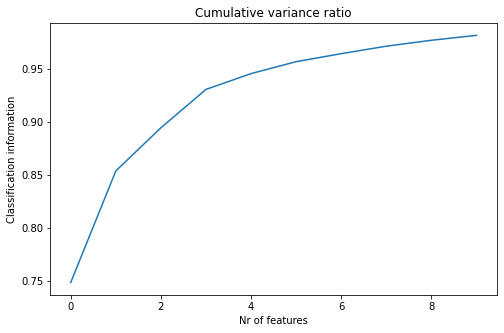

10 Features cumulative sum (Normalized & PCA):  98.13 %


In [146]:
#@title Normalizing & Splitting data into training/test datasets for both with and without PCA analysis
# Normalizing data values using Sklearn StandardScaler (FOR PCA) 
x = final_df

#Normalize data using MinMax Scaler (necessary for PCA implemented later)
scaler = preprocessing.MinMaxScaler()
X_type_norm = scaler.fit_transform(x)


# split in train and test sets WITHOUT normalizing
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(x, target1_type, test_size=0.33, shuffle=True, random_state=42)

# split in train and test sets WITH normalizing
X_train_type_scaled, X_test_type_scaled, y_train_type_scaled, y_test_type_scaled = train_test_split(X_type_norm, target1_type, test_size=0.33, shuffle=True, random_state=42)


# Calculate variance ratios with PCA (normalizing)
pca1 = PCA(.98, svd_solver='full')
X_train_type_scaled_pca = pca1.fit_transform(X_train_type_scaled)
X_test_type_scaled_pca = pca1.transform(X_test_type_scaled)

print("X_type_pca_scaled: ",X_train_type_scaled_pca.shape)

print("Number of principal components responsible for 95% of variance in data: " + str(pca1.n_components_))


# Plot features pca var ratios for normalized
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.title('Cumulative variance ratio')
plt.xlabel('Nr of features')
plt.ylabel('Classification information')
plt.show()

print(str(pca1.n_components_) + " " + 'Features cumulative sum (Normalized & PCA): ', round(sum(pca1.explained_variance_ratio_[0:25])*100,2), '%')


# Implementing KNN Algorithm (non-scaled & non-PCA)

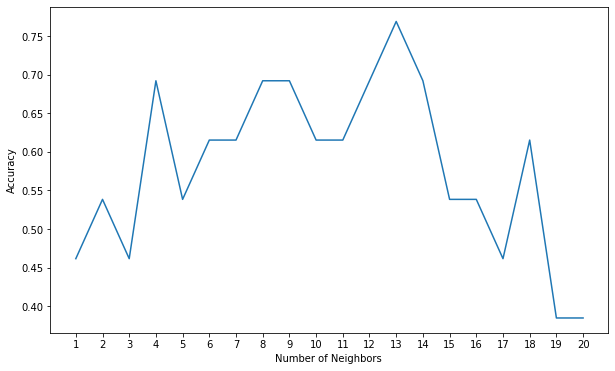

In [147]:
#@title KNN Algorithm (without scaling and PCA
# KNN Algorithm ]
# Determining optimal number of neighbors

knn = KNeighborsClassifier()

y_train_type=y_train_type.astype('int')
y_test_type = y_test_type.astype('int')
y_train_type_scaled = y_train_type_scaled.astype('int')
y_test_type_scaled = y_test_type_scaled.astype('int')
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_type,y_train_type)
    yhat= knn.predict(X_test_type)
    mean_acc[i-1] = metrics.accuracy_score(y_test_type, yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()



In [126]:
#@title Getting mean accuracy values for KNN algorithm implemented for dataset without scaling and feature selection
# Getting mean accuracy values for KNN algorithm implemented for dataset without scaling and feature selection;
maxNeighbors = 20
features = [features for features in range(1,maxNeighbors)]
ytest = [0 for x in range(1,maxNeighbors)]
ytrain = [0 for x in range(1,maxNeighbors)]

# For loop to calculate accuracy scores for each case
for j in range(1, maxNeighbors):
  knn = KNeighborsClassifier(n_neighbors=j)
  #For unnormalized and nonPCA dataset
  knn.fit(X_train_type,y_train_type)
  train_type_score = knn.score(X_train_type,y_train_type)
  test_type_score = knn.score(X_test_type, y_test_type)

  ytrain[j-1]=train_type_score   
  ytest[j-1]=test_type_score

print('Score with unnormalized and non-PCA dataset: ', round(max(ytest),3), "," , 'when num_Neighbors =',features[ytest.index(max(ytest))])

Score with unnormalized and non-PCA dataset:  0.769 , when num_Neighbors = 13


In [148]:
#@title Further hyper parameter tuning for optimal KNN model
# Hyper parameter tuning for optimal KNN model

grid_params = {'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               }

gridSearch = GridSearchCV(knn, param_grid = grid_params, verbose = 1, cv=5)

gridSearch_result = gridSearch.fit(X_train_type, y_train_type)


print("Best Score: " + str(gridSearch_result.best_score_))
print("Best Parameters: " + str(gridSearch.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Score: 0.5800000000000001
Best Parameters: {'metric': 'minkowski', 'weights': 'uniform'}


In [150]:
#@title Using optimal hyper parameters for training KNN classifier
# Using optimal hyper parameters for training KNN classifier
knn_clf = KNeighborsClassifier(leaf_size=1,metric='minkowski',n_neighbors=13,weights='uniform')
# Fitting model to training data
knn_clf.fit(X_train_type, y_train_type)
predictions = knn_clf.predict(X_test_type)
knn_score = knn_clf.score(X_test_type,y_test_type, sample_weight=None)


print(classification_report(y_test_type,predictions))
print('F1 score:', f1_score(y_test_type, predictions,average='weighted'))
print('Recall:', recall_score(y_test_type, predictions,average='weighted'))
print('Precision:', precision_score(y_test_type, predictions, average='weighted'))
print("accuracy score for KNN classifier is: ",accuracy_score(y_test_type,predictions))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13

F1 score: 0.7720279720279719
Recall: 0.7692307692307693
Precision: 0.7838827838827839
accuracy score for SVM classifier is:  0.7692307692307693


# Implementing SVM algorithm (non-scaled & non-PCA)

In [151]:
#@title Hyper parameter optimization using GridSearchCV for SVM (non-scaled & non-PCA)
# Parameter grid

svm_param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100], 'gamma':['scale', 'auto'], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]} 

# Create SVM grid search classifier
svm_grid = GridSearchCV(svm.SVC(), param_grid = svm_param_grid, cv=5)

# Train the classifier
svm_grid.fit(X_train_type, y_train_type)
print("Best Parameters:\n", svm_grid.best_params_)




Best Parameters:
 {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}


accuracy score for SVM classifier is:  0.5384615384615384
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.44      0.80      0.57         5

    accuracy                           0.54        13
   macro avg       0.60      0.59      0.54        13
weighted avg       0.63      0.54      0.53        13



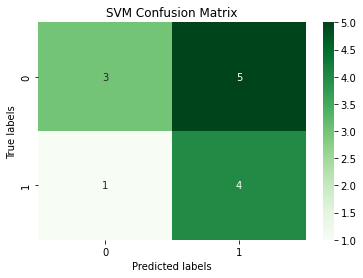

In [152]:
#@title Using optimal hyper parameters found above to train classifier
#SVM Classifier
# Using optimal hyper parameters found above to train classifier
svm_classifier =svm.SVC(C=10,decision_function_shape='ovo',gamma='auto',kernel='rbf')
# fitting model to training data
svm_classifier.fit(X_train_type, y_train_type)

predictions_svm = svm_classifier.predict(X_test_type)
svm_score = svm_classifier.score(X_test_type,y_test_type)



cm_svm =  confusion_matrix(y_test_type, predictions_svm)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='Greens') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 


print("accuracy score for SVM classifier is: ",accuracy_score(y_test_type,predictions_svm))

print(classification_report(y_test_type,predictions_svm))


# Implementing KNN algorithm (Scaled & Non-PCA)

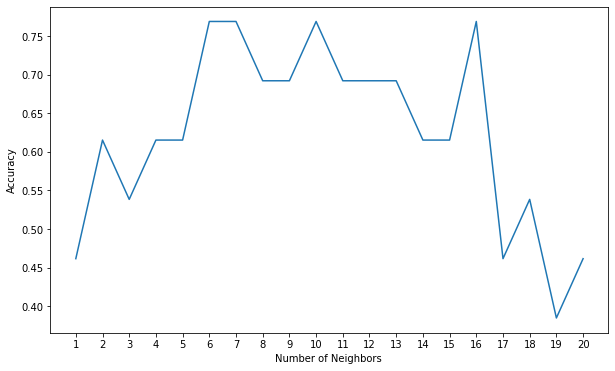

In [153]:
#@title KNN Algorithm (scaled & non-pca). Determining optimal number of neighbors
# KNN Algorithm (Using PCA features & Scaled)
# Determining optimal number of neighbors

knn = KNeighborsClassifier()

# Transforming label variable to int
y_train_type_scaled = y_train_type_scaled.astype('int')
y_test_type_scaled = y_test_type_scaled.astype('int')
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_type_scaled,y_train_type_scaled)
    predictions_scaled= knn.predict(X_test_type_scaled)
    mean_acc[i-1] = metrics.accuracy_score(y_test_type, predictions_scaled)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()



In [154]:
#@title Getting mean accuracy values for KNN algorithm implemented on dataset with scaling but without PCA
# Getting mean accuracy values for KNN algorithm implemented on dataset with scaling but without PCA
maxNeighbors = 20
features = [features for features in range(1,maxNeighbors)]
ytest_scaled = [0 for x in range(1,maxNeighbors)]
ytrainScaled = [0 for x in range(1,maxNeighbors)]


# For loop to calculate accuracy scores for each case
for j in range(1, maxNeighbors):
  knn = KNeighborsClassifier(n_neighbors=j)

  #For normalized dataset
  knn.fit(X_train_type_scaled,y_train_type_scaled)
  train_type_score_scaled = knn.score(X_train_type_scaled,y_train_type_scaled)
  test_type_score_scaled = knn.score(X_test_type_scaled, y_test_type_scaled)

  ytrainScaled[j-1]=train_type_score_scaled   
  ytest_scaled[j-1]=test_type_score_scaled


print('Score with Normalized dataset: ', round(max(ytest_scaled),3), ",",'when num_Neighbors =',features[ytest_scaled.index(max(ytest_scaled))])


Score with Normalized dataset:  0.769 , when num_Neighbors = 6


In [155]:
#@title Further hyper parameter tuning for optimal KNN model
# Hyper parameter tuning for optimal KNN model

grid_params = {'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
               }

gridSearch = GridSearchCV(knn, param_grid = grid_params, verbose = 1, cv=5,scoring = 'accuracy')

gridSearch_result = gridSearch.fit(X_train_type_scaled, y_train_type_scaled)


print("Best Score: " + str(gridSearch_result.best_score_))
print("Best Parameters: " + str(gridSearch.best_params_))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Score: 0.6533333333333333
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'uniform'}


In [156]:
#@title Using optimal hyper parameters found above to train classifier
# Using optimal hyper parameters found above to train classifier
knn_clf_scaled = KNeighborsClassifier(leaf_size=1,metric='minkowski',n_neighbors=4,weights='uniform')
# Fitting model to training data
knn_clf_scaled.fit(X_train_type_scaled, y_train_type_scaled)
predictions_scaled = knn_clf_scaled.predict(X_test_type_scaled)
knn_score_scaled = knn_clf_scaled.score(X_test_type_scaled,y_test_type_scaled, sample_weight=None)




print(classification_report(y_test_type_scaled,predictions_scaled))
print('F1 score:', f1_score(y_test_type_scaled, predictions_scaled,average='weighted'))
print('Recall:', recall_score(y_test_type_scaled, predictions_scaled,average='weighted'))
print('Precision:', precision_score(y_test_type_scaled, predictions_scaled, average='weighted'))
print("accuracy score for KNN classifier is: ",accuracy_score(y_test_type_scaled,predictions_scaled))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.50      0.40      0.44         5

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13

F1 score: 0.6053293112116642
Recall: 0.6153846153846154
Precision: 0.6025641025641025
accuracy score for SVM classifier is:  0.6153846153846154


# Implementing SVM algorithm (Scaled & Non-PCA)

In [157]:
#@title Hyper parameter tuning to find optimal parameters for SVM (scaled & non-PCA)
# Parameter grid

svm_param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100], 'gamma':['scale', 'auto'], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]} 

# Create SVM grid search classifier
svm_grid = GridSearchCV(svm.SVC(), param_grid = svm_param_grid, cv=5)

# Train the classifier
svm_grid.fit(X_train_type_scaled, y_train_type_scaled)
print("Best Parameters:\n", svm_grid.best_params_)




Best Parameters:
 {'C': 0.001, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


accuracy score for SVM classifier is:  0.38461538461538464
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.38      1.00      0.56         5

    accuracy                           0.38        13
   macro avg       0.19      0.50      0.28        13
weighted avg       0.15      0.38      0.21        13



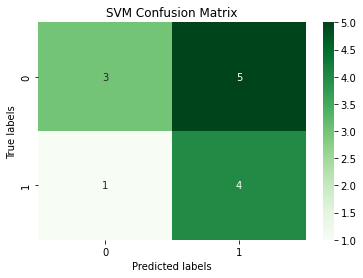

In [158]:
#@title Using optimal hyper parameters found above to train SVM classifier
#SVM Classifier with scaling (without PCA)

svm_classifier_scaled =svm.SVC(C=0.001,decision_function_shape='ovo',gamma='scale',kernel='linear')
# Fitting model to training data
svm_classifier_scaled.fit(X_train_type_scaled, y_train_type_scaled)

predictions_svm_scaled = svm_classifier_scaled.predict(X_test_type_scaled)
svm_score_scaled = svm_classifier_scaled.score(X_test_type_scaled,y_test_type_scaled)


# Plotting confusion matrix
cm_svm_scaled =  confusion_matrix(y_test_type_scaled, predictions_svm_scaled)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='Greens') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 


print("accuracy score for SVM classifier is: ",accuracy_score(y_test_type_scaled,predictions_svm_scaled))

print(classification_report(y_test_type_scaled,predictions_svm_scaled))


# Implementing KNN algorithm (Scaled & PCA)

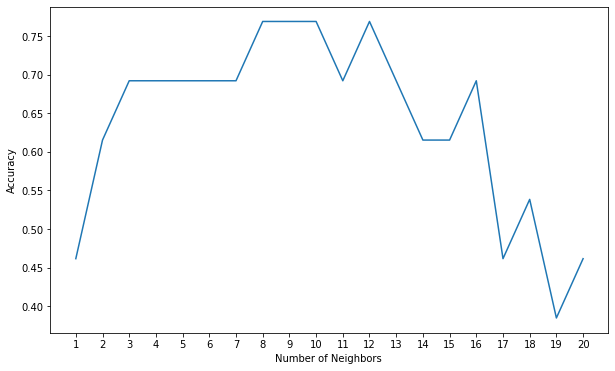

In [159]:
#@title KNN Algorithm (Using PCA features & Scaled). Determining optimal number of neighbors
# KNN Algorithm (Using PCA features & Scaled)
# Determining optimal number of neighbors

knn_pca = KNeighborsClassifier()

# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn_pca = KNeighborsClassifier(n_neighbors = i).fit(X_train_type_scaled_pca,y_train_type_scaled)
    yhat= knn_pca.predict(X_test_type_scaled_pca)
    mean_acc[i-1] = metrics.accuracy_score(y_test_type_scaled, yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()



In [160]:
#@title Getting mean accuracy values for KNN algorithm implemented for scaled dataset with feature selection
# Getting mean accuracy values for KNN algorithm implemented for scaled dataset with feature selection
maxNeighbors = 20
features = [features for features in range(1,maxNeighbors)]
ytestpca = [0 for x in range(1,maxNeighbors)]
ytrainpca = [0 for x in range(1,maxNeighbors)]

# For loop to calculate accuracy scores for each case
for j in range(1, maxNeighbors):
  knn = KNeighborsClassifier(n_neighbors=j)
  #For unnormalized and nonPCA dataset
  knn.fit(X_train_type_scaled_pca,y_train_type_scaled)
  train_type_score_pca = knn.score(X_train_type_scaled_pca,y_train_type_scaled)
  test_type_score_pca = knn.score(X_test_type_scaled_pca, y_test_type_scaled)

  ytrainpca[j-1]=train_type_score_pca   
  ytestpca[j-1]=test_type_score_pca

print('Score with scaled and PCA dataset: ', round(max(ytestpca),3), "," , 'when num_Neighbors =',features[ytestpca.index(max(ytestpca))])

Score with unnormalized and non-PCA dataset:  0.769 , when num_Neighbors = 8


In [161]:
#@title Further hyper parameter tuning for optimal KNN model
# Hyper parameter tuning for optimal KNN model

grid_params = {'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               }

gridSearch = GridSearchCV(knn, param_grid = grid_params, verbose = 1, cv=5)

gridSearch_result_pca = gridSearch.fit(X_train_type_scaled_pca, y_train_type_scaled)


print("Best Score: " + str(gridSearch_result_pca.best_score_))
print("Best Parameters: " + str(gridSearch.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Score: 0.5800000000000001
Best Parameters: {'metric': 'minkowski', 'weights': 'uniform'}


In [164]:
#@title Best parameters found above will be used for training KNN classifier (PCA & scaled)
# Best parameters found above will be used for training

knn_clf_pca = KNeighborsClassifier(leaf_size=1,metric='minkowski',n_neighbors=8,weights='uniform')
# Fitting model to training data
knn_clf_pca.fit(X_train_type_scaled_pca, y_train_type_scaled)
predictions_pca = knn_clf_pca.predict(X_test_type_scaled_pca)
knn_score_pca = knn_clf_pca.score(X_test_type_scaled_pca,y_test_type_scaled)

print(classification_report(y_test_type_scaled,predictions_pca))
print('F1 score:', f1_score(y_test_type_scaled, predictions_pca,average='weighted'))
print('Recall:', recall_score(y_test_type_scaled, predictions_pca,average='weighted'))
print('Precision:', precision_score(y_test_type_scaled, predictions_pca, average='weighted'))
print("accuracy score for KNN classifier is: ",accuracy_score(y_test_type_scaled,predictions_pca))


              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.75      0.60      0.67         5

    accuracy                           0.77        13
   macro avg       0.76      0.74      0.75        13
weighted avg       0.77      0.77      0.76        13

F1 score: 0.7631975867269986
Recall: 0.7692307692307693
Precision: 0.767094017094017
accuracy score for SVM classifier is:  0.7692307692307693
0.7692307692307693


# Implementing SVM algorithm (Scaled & PCA)

In [165]:
#@title Hyper parameter tuning to find optimal parameters for SVM algorithm (scaled & PCA)
# Parameter grid

svm_param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100], 'gamma':['scale', 'auto'], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]} 

# Create SVM grid search classifier
svm_grid_pca = GridSearchCV(svm.SVC(), param_grid = svm_param_grid, cv=5)

# Train the classifier
svm_grid_pca.fit(X_train_type_scaled_pca, y_train_type_scaled)
print("Best Parameters:\n", svm_grid_pca.best_params_)




Best Parameters:
 {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


accuracy score for SVM classifier is:  0.46153846153846156
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.38      0.60      0.46         5

    accuracy                           0.46        13
   macro avg       0.49      0.49      0.46        13
weighted avg       0.51      0.46      0.46        13



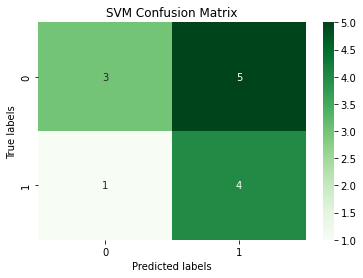

In [166]:
#@title #SVM Classifier with scaling and PCA. Best parameters found above will be used for training
#SVM Classifier with scaling and PCA
# Best parameters found above will be used for training
svm_classifier_scaled_pca =svm.SVC(C=10,decision_function_shape='ovo',gamma='scale',kernel='linear')

# Fitting model to training data
svm_classifier_scaled_pca.fit(X_train_type_scaled_pca, y_train_type_scaled)

predictions_svm_scaled_pca = svm_classifier_scaled_pca.predict(X_test_type_scaled_pca)
svm_score_scaled_pca = svm_classifier_scaled_pca.score(X_test_type_scaled_pca,y_test_type_scaled)



cm_svm_scaled_pca =  confusion_matrix(y_test_type_scaled, predictions_svm_scaled_pca)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='Greens') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 


print("accuracy score for SVM classifier is: ",accuracy_score(y_test_type_scaled,predictions_svm_scaled_pca))

print(classification_report(y_test_type_scaled,predictions_svm_scaled_pca))


# Results

In [169]:
#@title Comparing the results from all used models

print(classification_report(y_test_type,predictions))
print('F1 score:', f1_score(y_test_type, predictions,average='weighted'))
print('Recall:', recall_score(y_test_type, predictions,average='weighted'))
print('Precision:', precision_score(y_test_type, predictions, average='weighted'))
print("accuracy score for KNN classifier (Non-scaled & non-PCA) is: ",accuracy_score(y_test_type,predictions))

print('=================================================================================')


print(classification_report(y_test_type,predictions_svm))
print("accuracy score for SVM classifier (Non-scaled & non-PCA) is: ",accuracy_score(y_test_type,predictions_svm))
print('=================================================================================')

print(classification_report(y_test_type_scaled,predictions_scaled))
print('F1 score:', f1_score(y_test_type_scaled, predictions_scaled,average='weighted'))
print('Recall:', recall_score(y_test_type_scaled, predictions_scaled,average='weighted'))
print('Precision:', precision_score(y_test_type_scaled, predictions_scaled, average='weighted'))
print("accuracy score for KNN classifier (scaled & non-PCA) is: ",accuracy_score(y_test_type_scaled,predictions_scaled))
print('=================================================================================')

print(classification_report(y_test_type_scaled,predictions_svm_scaled))
print("accuracy score for SVM classifier (scaled & non-PCA) is: ",accuracy_score(y_test_type_scaled,predictions_svm_scaled))


print('=================================================================================')

print(classification_report(y_test_type_scaled,predictions_pca))
print('F1 score:', f1_score(y_test_type_scaled, predictions_pca,average='weighted'))
print('Recall:', recall_score(y_test_type_scaled, predictions_pca,average='weighted'))
print('Precision:', precision_score(y_test_type_scaled, predictions_pca, average='weighted'))
print("accuracy score for KN classifier (scaled & PCA) is: ",accuracy_score(y_test_type_scaled,predictions_pca))

print('=================================================================================')

print(classification_report(y_test_type_scaled,predictions_svm_scaled_pca))
print("accuracy score for SVM classifier (scaled & PCA) is: ",accuracy_score(y_test_type_scaled,predictions_svm_scaled_pca))




              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13

F1 score: 0.7720279720279719
Recall: 0.7692307692307693
Precision: 0.7838827838827839
accuracy score for KNN classifier (Non-scaled & non-PCA) is:  0.7692307692307693
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.44      0.80      0.57         5

    accuracy                           0.54        13
   macro avg       0.60      0.59      0.54        13
weighted avg       0.63      0.54      0.53        13

accuracy score for SVM classifier (Non-scaled & non-PCA) is:  0.5384615384615384
              precision    recall  f1-score   support

           0       0.67      0.75      0.71

# Discussion and Conclusion

> From classification reports it is clear that KNN outperformed SVM in every case. The best result was showed by KNN (scaled and PCA) algorithm - F1 score of 0.7631. In comparison SVM models usually showed lower than 50% accuracy which is worse than guessing. 

> The optimal hyper parameters for KNN model were:
*   K = 8
*   distance - minkowski
*   weights - uniform

> The result is opposite of our initial assumption, that SVM should have performed better than KNN for this type of data. Also, the missing values in the original dataset might be part of the problem. To deal with missing values, I removed the columns (features) that were empty. This itself reduced number of features from 2880 to around 880. It is possible that important data was lost during this reduction. After careful analysis of dataset, it became clear to me that most of the missing values were particular to specific patients only. 

> In future, this mistake can be corrected by removing the patient instance instead of features. Due to limited time and resources it was not possible to correct this mistake and recalculate the results. Also, for future work it would be interesting to conduct unsupervised clustering on the dataset (without labels) to find interesting patterns and correlations between features that are hard to detect without ML. 



# References



*   https://stats.stackexchange.com/questions/27300/using-principal-component-analysis-pca-for-feature-selection
*   https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4
*   https://web.archive.org/web/20070630074513fw_/http://research.i2r.a-star.edu.sg/rp/LungCancer/LungCancer-Ontario.html
*   https://hal.archives-ouvertes.fr/hal-01657491/document
*   Forsythe, Marika L et al. “Molecular profiling of non-small cell lung cancer.” PloS one vol. 15,8 e0236580. 5 Aug. 2020, doi:10.1371/journal.pone.0236580
*   J. Pati, "Gene Expression Analysis for Early Lung Cancer Prediction Using Machine Learning Techniques: An Eco-Genomics Approach," in IEEE Access, vol. 7, pp. 4232-4238, 2019, doi: 10.1109/ACCESS.2018.2886604.

In [ ]:
# Code snippet for saving dataframe to process it using Weka.
#Concatenatig cleaned features and labels datasets
for_weka = pd.concat([final_df,target1_type],axis=1)
for_weka



save_path = '/content/drive/My Drive/output_weka.csv'

with open(save_path, 'w', encoding = 'utf-8-sig') as f:
  for_weka.to_csv(f)